# Time_Series_Forecasting (ARIMA on Sunspots)
## Author : Ashish Kumar Patra
## 1. Import the Required Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

mpl.rcParams['figure.figsize'] = (20, 7)
mpl.rcParams['axes.grid'] = False

## 2. Load the Dataset

In [2]:
from dateutil.parser import parse
dateparse = lambda dates:parse(dates)

In [3]:
df = pd.read_csv('C:\\Users\\ASHISH\\Desktop\\DataSets\\Sunspots.csv',
                 usecols=['Date','Monthly Mean Total Sunspot Number'], parse_dates=['Date'],date_parser=dateparse)
df.head()

,Date,Monthly Mean Total Sunspot Number
0,1749-01-31,96.7
1,1749-02-28,104.3
2,1749-03-31,116.7
3,1749-04-30,92.8
4,1749-05-31,141.7


## 3. Check Various DataType

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3252 entries, 0 to 3251
Data columns (total 2 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Date                               3252 non-null   datetime64[ns]
 1   Monthly Mean Total Sunspot Number  3252 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 50.9 KB


## 4. Set Date as a Column not as an Index

In [5]:
df_non_index = df.copy()
df_non_index['Month'] = df_non_index.Date.dt.month
df_non_index.head()

,Date,Monthly Mean Total Sunspot Number,Month
0,1749-01-31,96.7,1
1,1749-02-28,104.3,2
2,1749-03-31,116.7,3
3,1749-04-30,92.8,4
4,1749-05-31,141.7,5


## 5. Extracting the Year under a Column named 'nth_year'

In [6]:
df_non_index['nth_year'] = [int(str(i)[3]) for i in (df_non_index.Date.dt.year)] # list Comprehension 
df_non_index['nth_year'].replace(0,10,inplace=True)
df_non_index.head(10)

,Date,Monthly Mean Total Sunspot Number,Month,nth_year
0,1749-01-31,96.7,1,9
1,1749-02-28,104.3,2,9
2,1749-03-31,116.7,3,9
3,1749-04-30,92.8,4,9
4,1749-05-31,141.7,5,9
5,1749-06-30,139.2,6,9
6,1749-07-31,158.0,7,9
7,1749-08-31,110.5,8,9
8,1749-09-30,126.5,9,9
9,1749-10-31,125.8,10,9


## 6. Plotting Daily wise , Month wise and Year wise

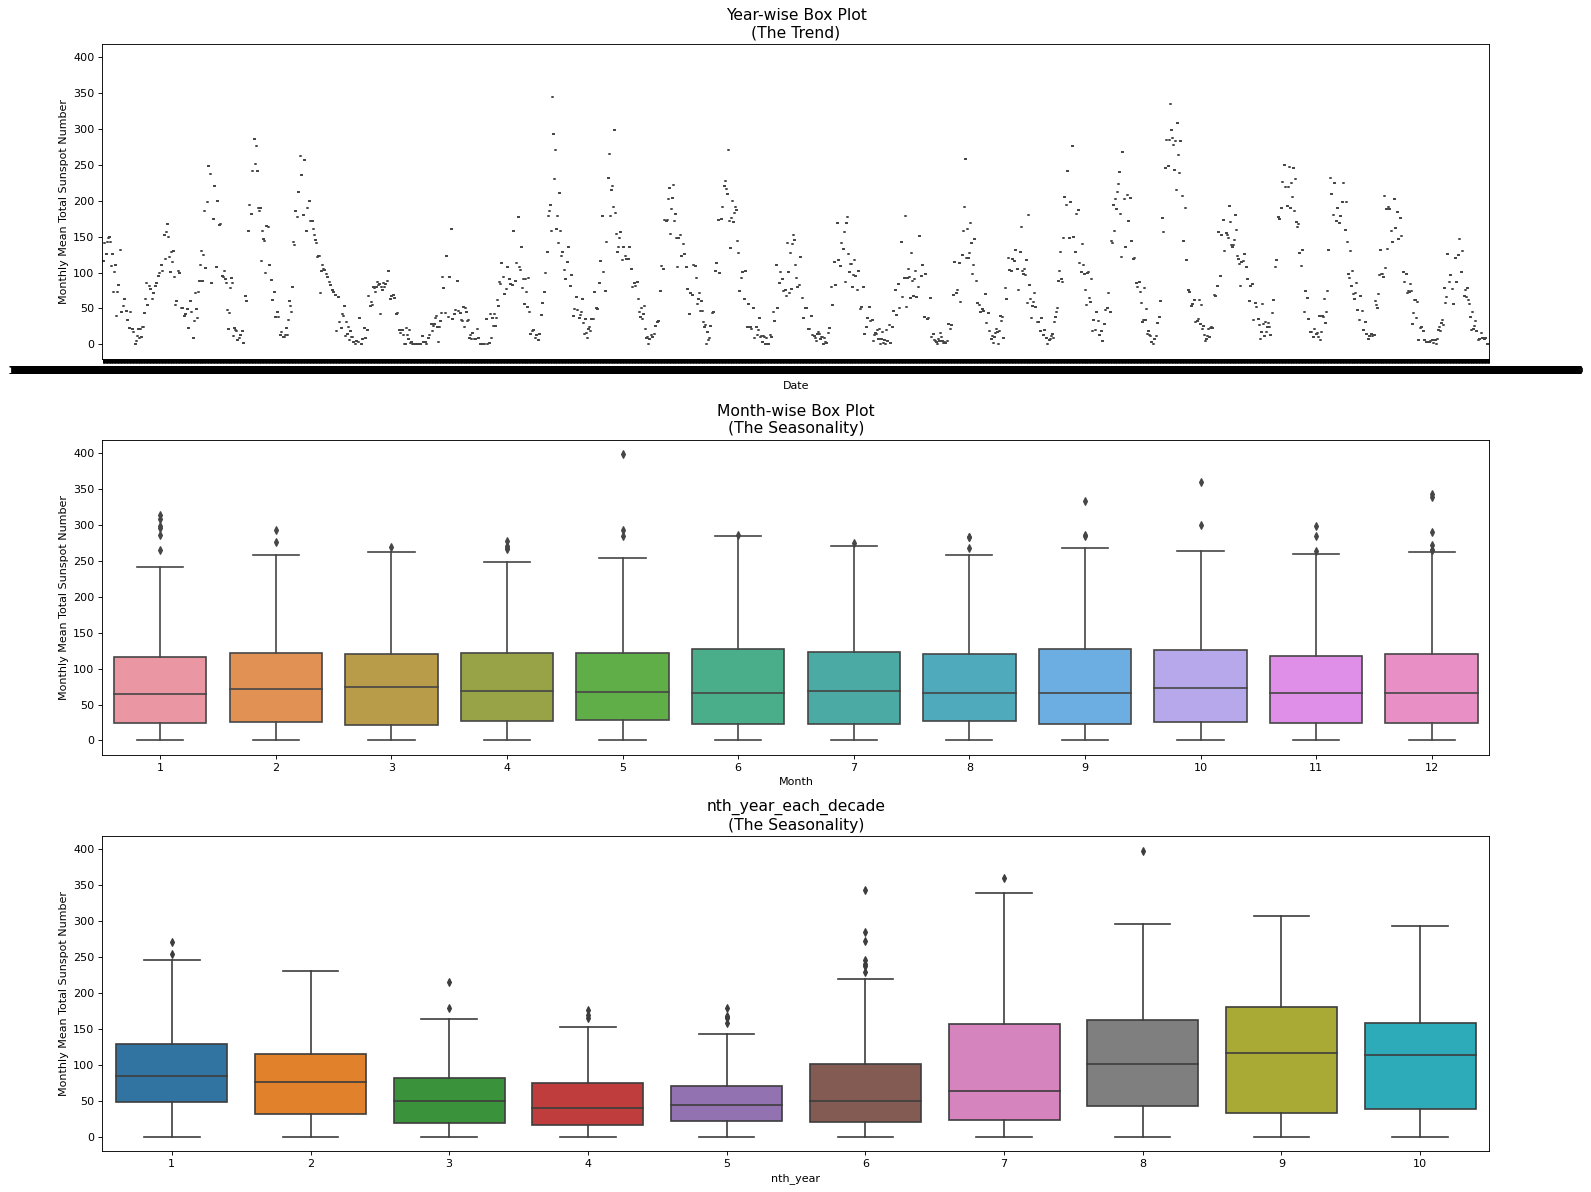

In [7]:
fig, axes = plt.subplots(3, 1, figsize=(20,15), dpi= 80)
sns.boxplot(x='Date', y='Monthly Mean Total Sunspot Number', data=df_non_index, ax=axes[0])
sns.boxplot(x='Month', y='Monthly Mean Total Sunspot Number', data=df_non_index,ax = axes[1])
sns.boxplot(x='nth_year', y='Monthly Mean Total Sunspot Number', data=df_non_index,ax = axes[2])
# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=14); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=14)
axes[2].set_title('nth_year_each_decade\n(The Seasonality)', fontsize=14)
fig.tight_layout()
plt.show()

## 7. Set Date as an Index not as a Column and Plot it

In [8]:
df = df.set_index('Date')
df.head()

,Monthly Mean Total Sunspot Number
Date,
1749-01-31,96.7
1749-02-28,104.3
1749-03-31,116.7
1749-04-30,92.8
1749-05-31,141.7


<AxesSubplot:xlabel='Date'>

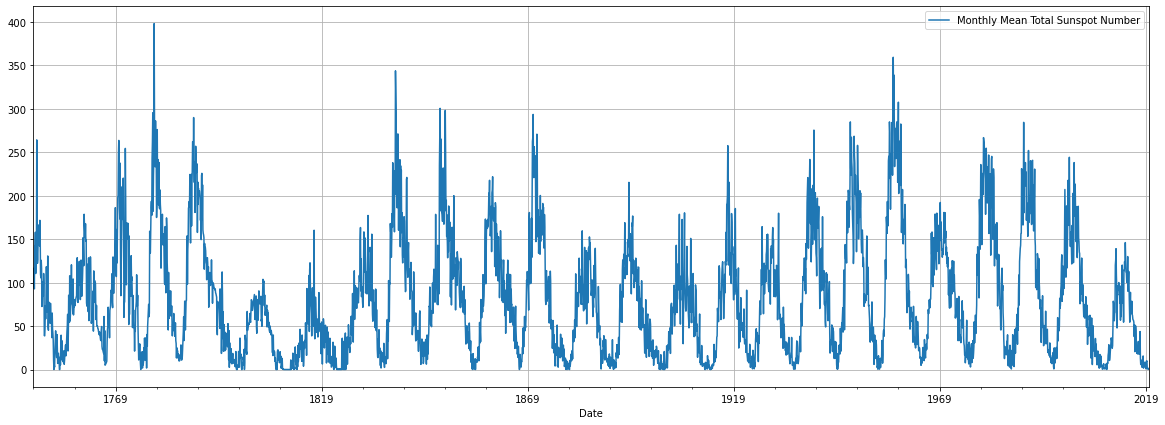

In [9]:
df.plot(grid=True)

<AxesSubplot:xlabel='Date'>

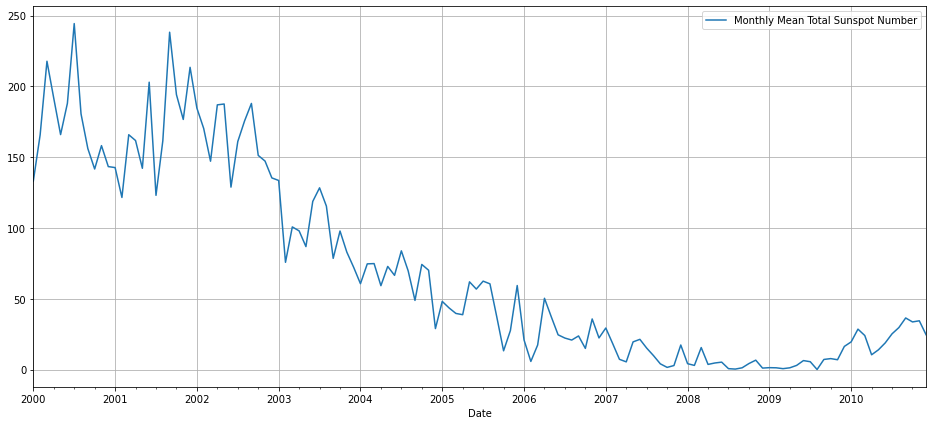

In [10]:
df_2018 = df.loc['2000':'2010']
df_2018.plot(figsize=(16,7),grid=True)

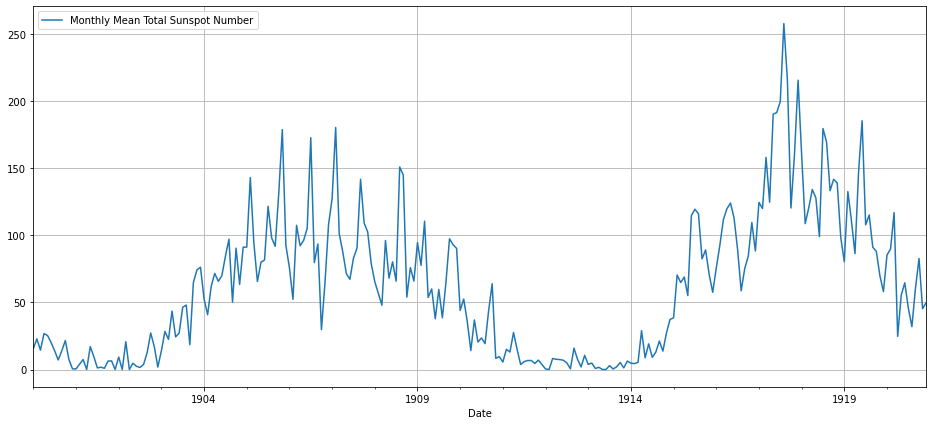

In [11]:
df_2018 = df.loc['1900':'1920']
df_2018.plot(figsize=(16,7),grid=True)
plt.show()

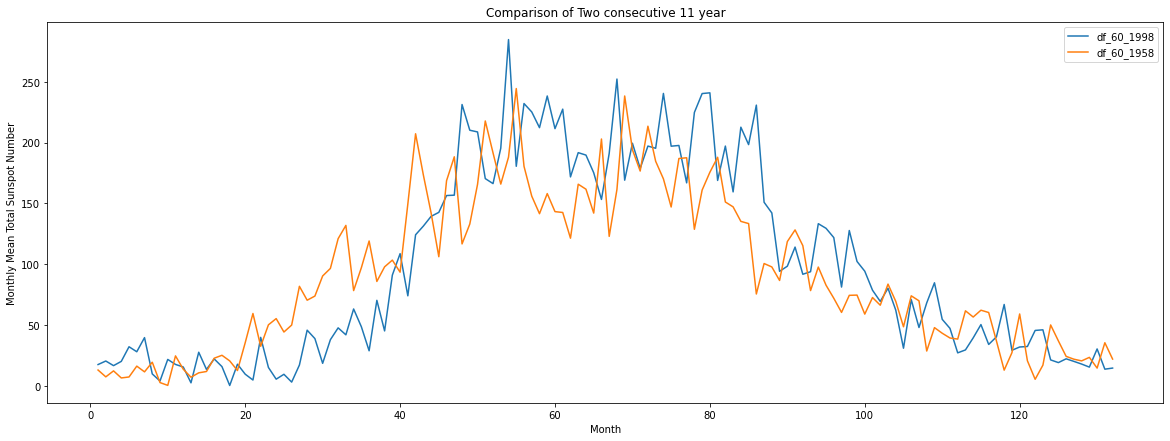

In [12]:
df_11_1985 = df_non_index[(df_non_index.Date.dt.year>=1985) & (df_non_index.Date.dt.year<1996)]
df_11_1996 = df_non_index[(df_non_index.Date.dt.year>=1996) &(df_non_index.Date.dt.year<2007)]

x = np.arange(1,len(df_11_1996['Date'])+1)

plt.plot(x, df_11_1985['Monthly Mean Total Sunspot Number'],label='df_60_1998')
plt.plot(x, df_11_1996['Monthly Mean Total Sunspot Number'],label='df_60_1958')
plt.legend()
plt.xlabel('Month')
plt.ylabel('Monthly Mean Total Sunspot Number')
plt.title('Comparison of Two consecutive 11 year')
plt.show()

## 8. Lag Plot

* It helps to understand the auto correlation lag, visualizing for few, normally lag greater than 4 is not useful.
* As we increase the lag time, the correlation is decresing.
* The data is correlated with its recent time lag upto 4/5 times lag.

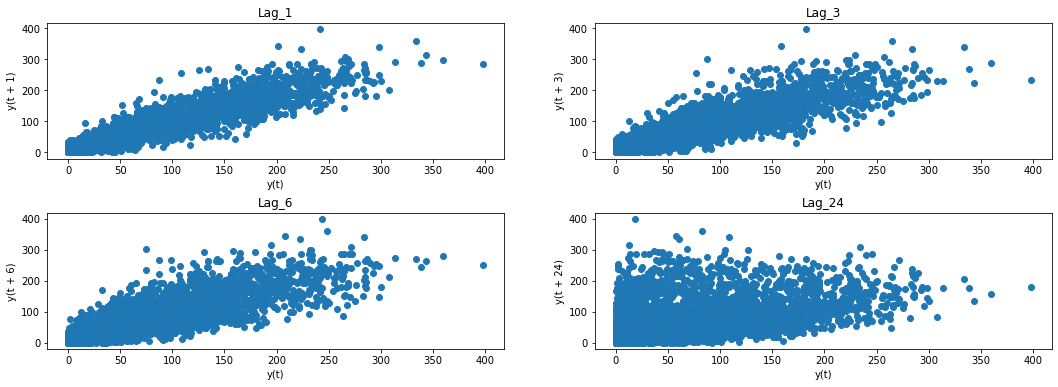

In [13]:
fig = plt.figure(figsize=(18,6))
fig.subplots_adjust(hspace=0.4, wspace=0.2)

ax1 = fig.add_subplot(2,2,1)
pd.plotting.lag_plot(df['Monthly Mean Total Sunspot Number'], lag=1)
plt.title('Lag_1')

ax2 = fig.add_subplot(2,2,2)
pd.plotting.lag_plot(df['Monthly Mean Total Sunspot Number'], lag=3)
plt.title('Lag_3')

ax3 = fig.add_subplot(2,2,3)
pd.plotting.lag_plot(df['Monthly Mean Total Sunspot Number'], lag=6)
plt.title('Lag_6')

ax3 = fig.add_subplot(2,2,4)
pd.plotting.lag_plot(df['Monthly Mean Total Sunspot Number'], lag=24)
plt.title('Lag_24')

plt.show()

## 9. Histogram & KDE Plot

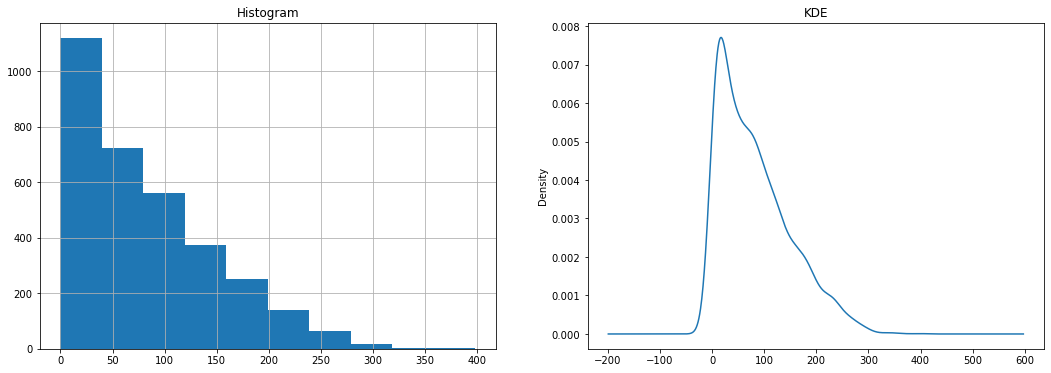

In [14]:
fig = plt.figure(figsize=(18,6))
fig.subplots_adjust(hspace=0.4, wspace=0.2)

ax1 = fig.add_subplot(1,2,1)
df['Monthly Mean Total Sunspot Number'].hist()
plt.title('Histogram')

ax2 = fig.add_subplot(1,2,2)
df['Monthly Mean Total Sunspot Number'].plot(kind='density') # Kernel Density Plot
plt.title('KDE')

plt.show()

## 10. Testing the Stationarity of Data
* Time Series are Stationary if they do not have Trend or Seasonal effects. Summary statistics calculated on the Time Series are consistent over Time, like the Mean or the Variance of the Observations.

* When a Time Series is Stationary, it can be easier to Model. Statistical Modeling methods assume or require the Time Series to be Stationary to be effective.

### i. Dickey-Fuller Test

In [15]:
from statsmodels.tsa.stattools import adfuller

data_series = df['Monthly Mean Total Sunspot Number']

print('Results of Dickey-Fuller Test :')
dftest = adfuller(data_series, autolag = 'AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test :
Test Statistic                -1.048087e+01
p-value                        1.214714e-18
#Lags Used                     2.800000e+01
Number of Observations Used    3.223000e+03
Critical Value (1%)           -3.432381e+00
Critical Value (5%)           -2.862437e+00
Critical Value (10%)          -2.567248e+00
dtype: float64


In [16]:
if dfoutput['Test Statistic'] < dfoutput['Critical Value (5%)']: 
  print('Series is Stationary')
else:
  print('Series is not Stationary')

# Or we can do like this :
#if dfoutput[1] > 0.05 :
#  print('Series is not Stationary')
#else:
#  print('Series is Stationary')

Series is Stationary


### ii. Kwiatkowski-Phillips-Schmidt-Shin Test

In [17]:
from statsmodels.tsa.stattools import kpss # Kwiatkowski-Phillips-Schmidt-Shin Test for Stationarity.

stats, p, lags, critical_values = kpss(df['Monthly Mean Total Sunspot Number'], 'c')

C:\Users\ASHISH\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [18]:
print(f'Test Statistics : {stats}')
print(f'p-value : {p}')
print(f'Critial Values : {critical_values}')

if p < 0.05 :
  print('Series is not Stationary')
else:
  print('Series is Stationary')

Test Statistics : 0.12684415541049626
p-value : 0.1
Critial Values : {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Series is Stationary


* Case 1 : Both Tests conclude that the Series is not Stationary => Series is not Stationary
* Case 2 : Both Tests conclude that the Series is Stationary => Series is Stationary
* Case 3 : KPSS = Stationary & ADF = Not Stationary  => Trend Stationary, Remove the Trend to make Series strict Stationary
* Case 4 : KPSS = Not Stationary & ADF = Stationary => Difference Stationary, use Differentiation to make Series Stationary

## 11. Modeling or Predicting
### i. Rolling Mean

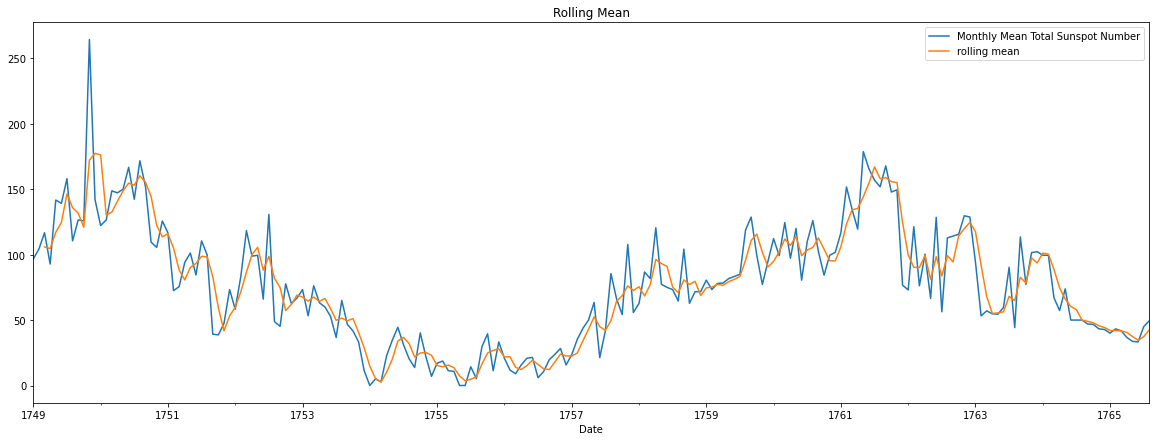

In [19]:
df['Monthly Mean Total Sunspot Number'][:200].plot() 
df['Monthly Mean Total Sunspot Number'][:200].rolling(3).mean().plot(label='rolling mean')

plt.legend()
plt.title('Rolling Mean')
plt.show()

### ii. Weighted Moving Average

In [20]:
# Function for Calculating Weighted Moving Average

def wma(weights): 
    def calc(x):
        return (weights*x).mean()
    return calc

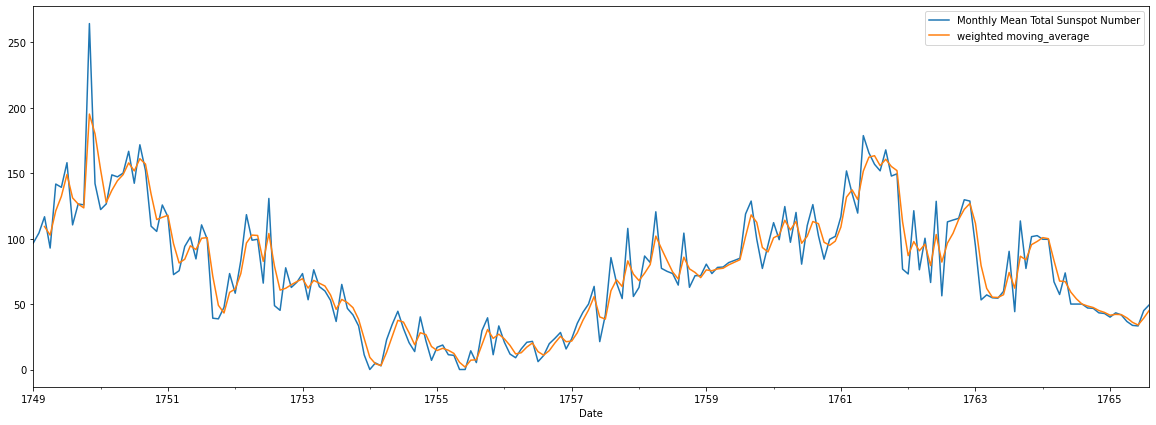

In [21]:
df['Monthly Mean Total Sunspot Number'][:200].plot()
df['Monthly Mean Total Sunspot Number'][:200].rolling(3).apply(wma(np.array([0.5,1,1.5]))).plot(label='weighted moving_average')

plt.legend()
plt.show()

### iii. Exponential Weighted Moving Average

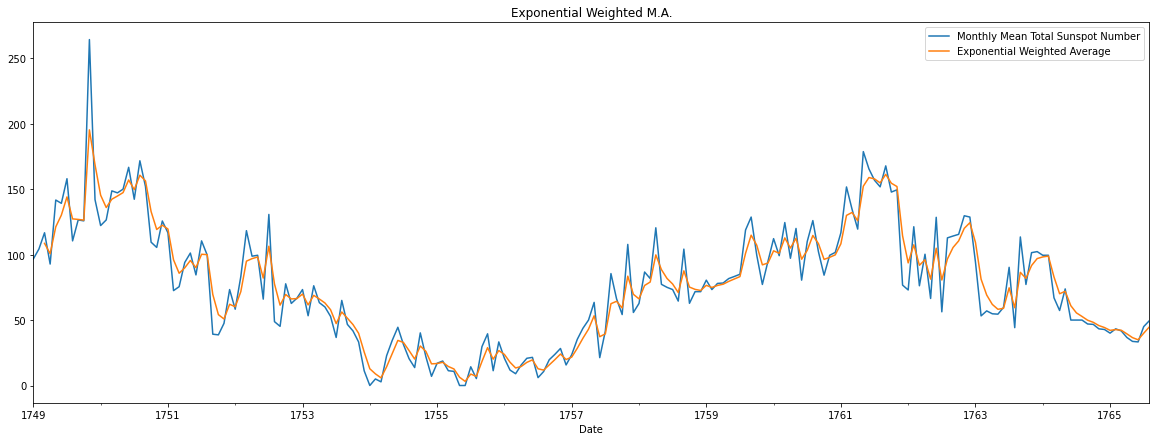

In [22]:
df['Monthly Mean Total Sunspot Number'][:200].plot()
df['Monthly Mean Total Sunspot Number'][:200].ewm(span=3, adjust=False, min_periods=3).mean().plot(label='Exponential Weighted Average')

plt.title('Exponential Weighted M.A.')
plt.legend()
plt.show()

### iv. Exponential Smoothing Moving Average

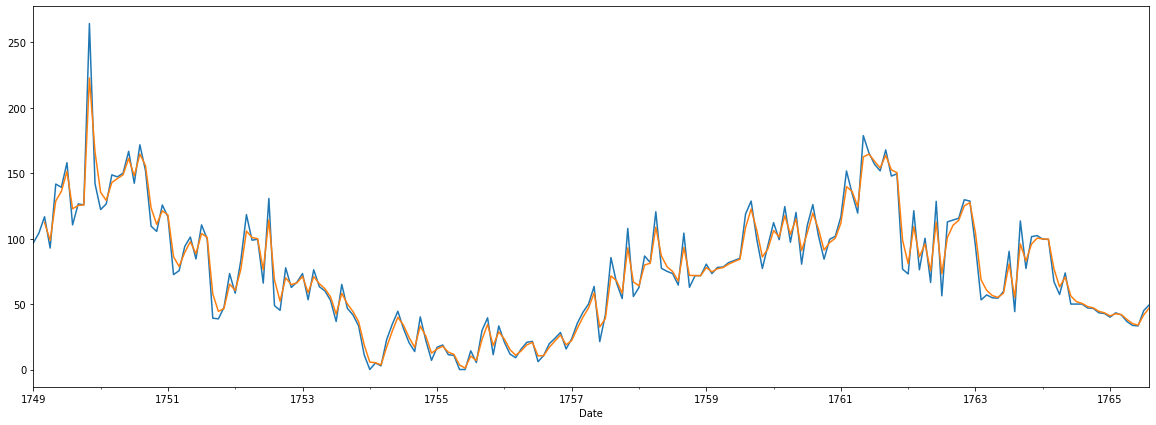

In [23]:
df['Monthly Mean Total Sunspot Number'][:200].plot() # Checking for only first 200 Dataset
df['Monthly Mean Total Sunspot Number'][:200].ewm(alpha=0.7, adjust=False, min_periods=3).mean().plot(label='Exponential Smoothing M A')
plt.show()

### v. Calculating RMSE

            Monthly Mean Total Sunspot Number  Rolling Mean         WMA  \
Date                                                                      
1749-01-31                               96.7           NaN         NaN   
1749-02-28                              104.3           NaN         NaN   
1749-03-31                              116.7    105.900000  109.233333   
1749-04-30                               92.8    104.600000  102.683333   
1749-05-31                              141.7    117.066667  121.233333   

              EWA       ESMA  
Date                          
1749-01-31   96.7        NaN  
1749-02-28  100.5        NaN  
1749-03-31  108.6  112.29600  
1749-04-30  100.7   98.64880  
1749-05-31  121.2  128.78464  


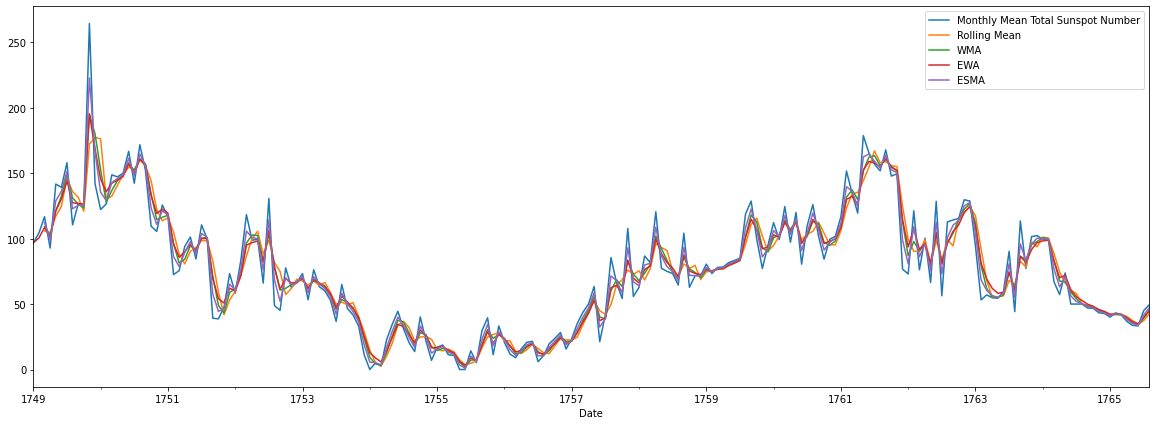

In [24]:
df_with_diff_avg = df[:200].copy()
df_with_diff_avg['Rolling Mean'] = df['Monthly Mean Total Sunspot Number'][:200].rolling(3).mean()
df_with_diff_avg['WMA'] = df['Monthly Mean Total Sunspot Number'][:200].rolling(window=3).apply(wma(np.array([0.5,1,1.5])))
df_with_diff_avg['EWA'] = df['Monthly Mean Total Sunspot Number'][:200].ewm(span=3, adjust=False, min_periods=0).mean()
df_with_diff_avg['ESMA'] = df['Monthly Mean Total Sunspot Number'][:200].ewm(alpha=0.7, adjust=False, min_periods=3).mean()

print(df_with_diff_avg.head())

df_with_diff_avg.plot()
plt.show()

In [25]:
df_with_diff_avg.dropna(inplace=True)
df_with_diff_avg.head()

,Monthly Mean Total Sunspot Number,Rolling Mean,WMA,EWA,ESMA
Date,,,,,
1749-03-31,116.7,105.900000,109.233333,108.6,112.296000
1749-04-30,92.8,104.600000,102.683333,100.7,98.648800
1749-05-31,141.7,117.066667,121.233333,121.2,128.784640
1749-06-30,139.2,124.566667,132.300000,130.2,136.075392
1749-07-31,158.0,146.300000,149.016667,144.1,151.422618


In [26]:
def RMSE_CAL(df):
    Rolling_Mean_RMSE = np.sqrt(np.sum((df.iloc[:,0]-df.iloc[:,1])**2))
    WMA_RMSE = np.sqrt(np.sum((df.iloc[:,0]-df.iloc[:,2])**2))
    EWA_RMSE = np.sqrt(np.sum((df.iloc[:,0]-df.iloc[:,3])**2))
    ESMA_RMSE = np.sqrt(np.sum((df.iloc[:,0]-df.iloc[:,4])**2))
    return {"Rolling_Mean_RMSE":Rolling_Mean_RMSE,"W_M_A_RMSE":WMA_RMSE,"E_W_A_RMSE":EWA_RMSE,"E_S_M_A_RMSE":ESMA_RMSE}

RMSE_CAL(df_with_diff_avg)

{'Rolling_Mean_RMSE': 234.97585928014917,
 'W_M_A_RMSE': 176.54292285761872,
 'E_W_A_RMSE': 170.051001146579,
 'E_S_M_A_RMSE': 105.42272489998321}

### vi. Seasonality , Trending and Noise Checking

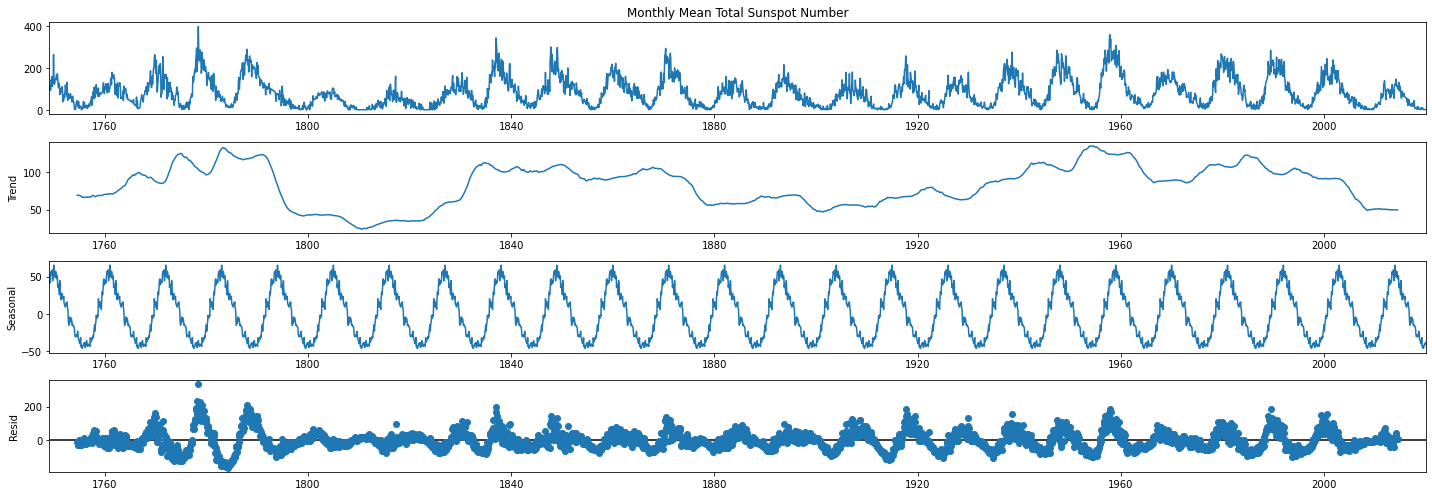

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['Monthly Mean Total Sunspot Number'], model="additive",freq=11*12) # Freq is 11 years and 12 months
result.plot()
plt.show()

In [28]:
total_sum = result.trend + result.seasonal + result.resid
total_sum[:100]

Date
1749-01-31     NaN
1749-02-28     NaN
1749-03-31     NaN
1749-04-30     NaN
1749-05-31     NaN
              ... 
1756-12-31    15.7
1757-01-31    23.5
1757-02-28    35.3
1757-03-31    43.7
1757-04-30    50.0
Length: 100, dtype: float64

### vii. Removing the Trend

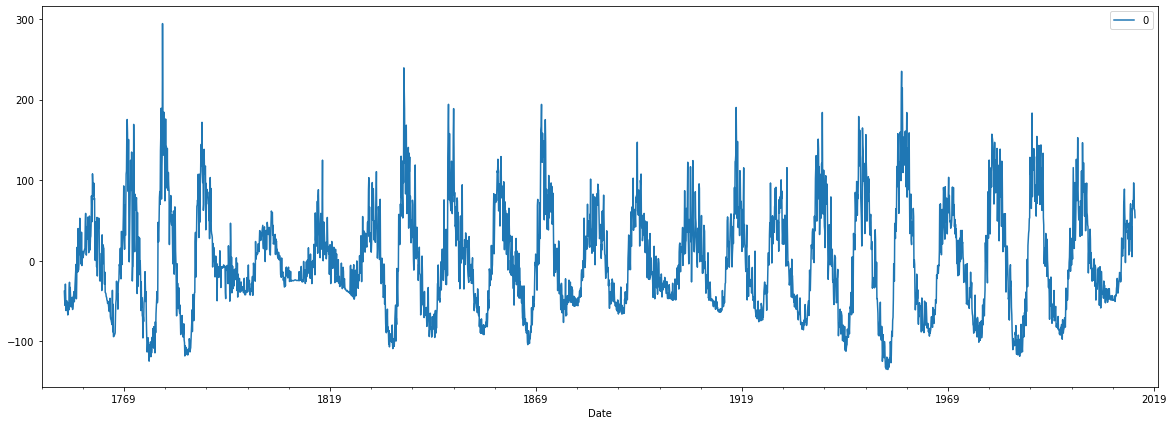

In [29]:
pd.DataFrame(result.observed-result.trend).plot()
plt.show()

### viii. Auto correlation Ploting

In [30]:
df['Monthly Mean Total Sunspot Number'][:100]

Date
1749-01-31     96.7
1749-02-28    104.3
1749-03-31    116.7
1749-04-30     92.8
1749-05-31    141.7
              ...  
1756-12-31     15.7
1757-01-31     23.5
1757-02-28     35.3
1757-03-31     43.7
1757-04-30     50.0
Name: Monthly Mean Total Sunspot Number, Length: 100, dtype: float64

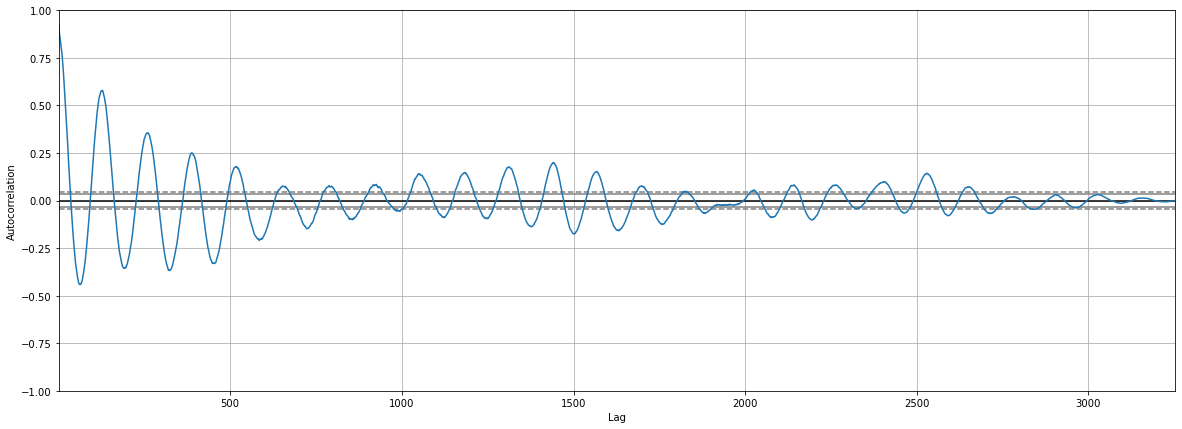

In [31]:
pd.plotting.autocorrelation_plot(df['Monthly Mean Total Sunspot Number']) # For each month
plt.show()

In [32]:
df['Monthly Mean Total Sunspot Number'].resample("1y").mean() # Year Level

Date
1749-12-31    134.875000
1750-12-31    139.000000
1751-12-31     79.441667
1752-12-31     79.666667
1753-12-31     51.125000
                 ...    
2015-12-31     69.783333
2016-12-31     39.825000
2017-12-31     21.816667
2018-12-31      7.008333
2019-12-31      3.591667
Freq: A-DEC, Name: Monthly Mean Total Sunspot Number, Length: 271, dtype: float64

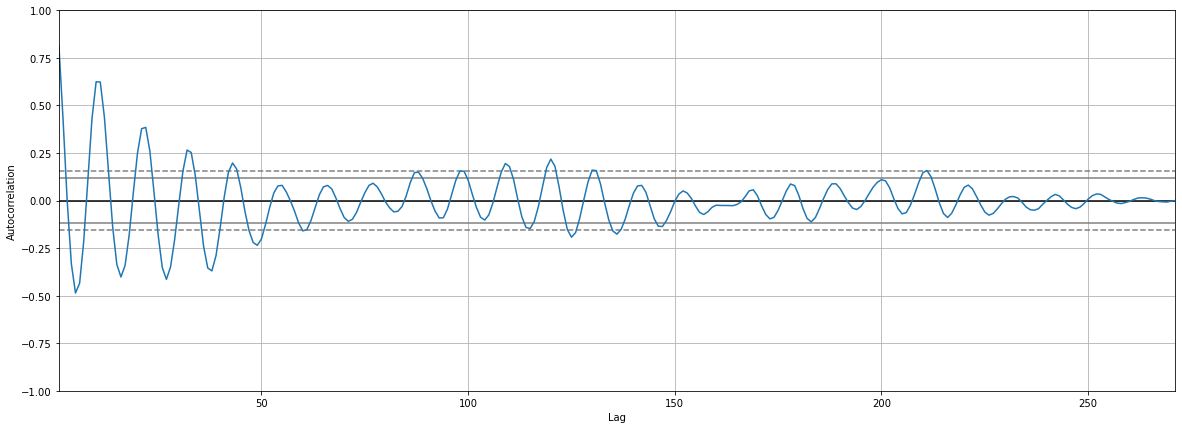

In [33]:
pd.plotting.autocorrelation_plot(df['Monthly Mean Total Sunspot Number'].resample("1y").mean())
plt.show()

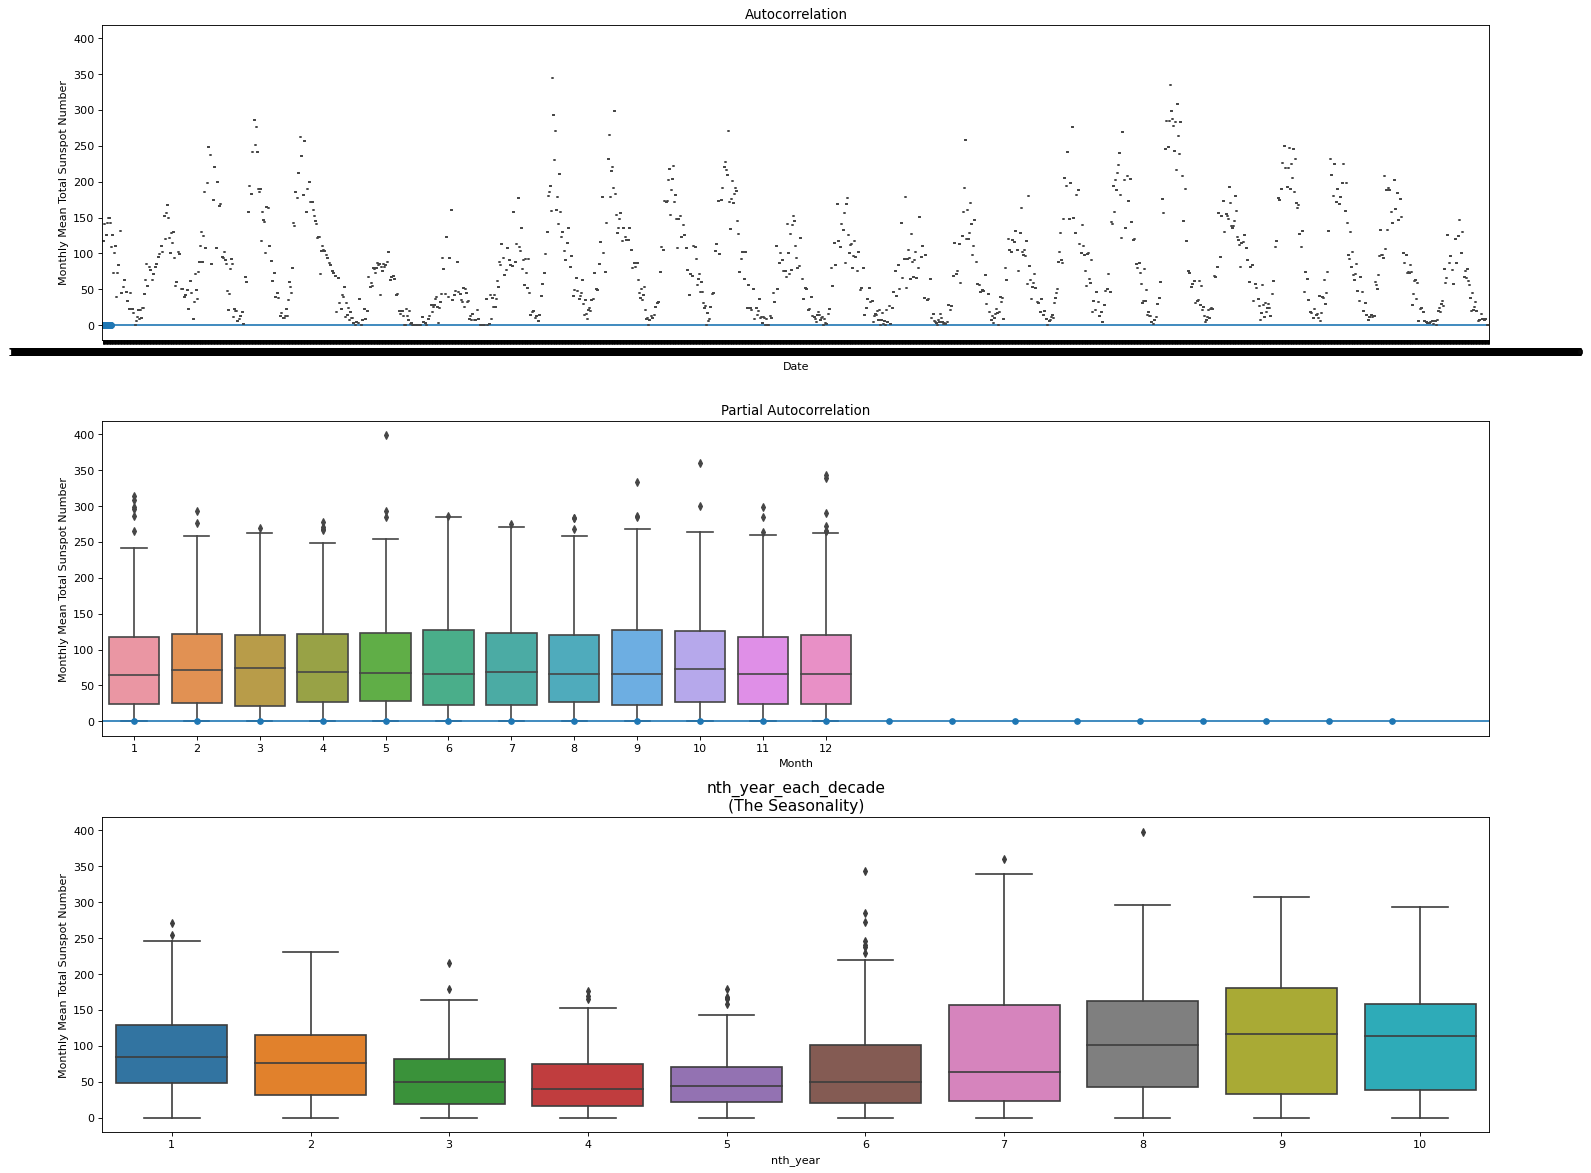

In [34]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Draw Plot
plot_acf(df['Monthly Mean Total Sunspot Number'].tolist(), lags=20, ax=axes[0])
plot_pacf(df['Monthly Mean Total Sunspot Number'].tolist(), lags=20, ax=axes[1])

## 13. ARIMA
ARIMA is an acronym which stands for **Auto Regressive Integrated Moving Average** and is a way of modeling time-series data for forecasting and is specified by three order parameters (p,d,q):
* AR(p): Pattern of Growth / Decline in the Data is accounted for
* I (d): Rate of change of the Growth / Decline is accounted for
* MA (q): Noise between Time Points is accounted for

### i. Installing the Package

In [35]:
# pip install pmdarima

### ii. Importing the Package and Instantiating

In [36]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split

model = pm.auto_arima(df['Monthly Mean Total Sunspot Number'], 
                        m=11, seasonal=True,
                      start_p=0, start_q=0, max_order=4, test='adf',error_action='ignore',  
                           suppress_warnings=True,
                      stepwise=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,0,1)[11] intercept   : AIC=33844.892, Time=5.43 sec
 ARIMA(0,0,0)(0,0,0)[11] intercept   : AIC=36662.504, Time=0.12 sec
 ARIMA(1,0,0)(1,0,0)[11] intercept   : AIC=30651.060, Time=3.58 sec
 ARIMA(0,0,1)(0,0,1)[11] intercept   : AIC=33078.193, Time=3.58 sec
 ARIMA(0,0,0)(0,0,0)[11]             : AIC=39591.690, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[11] intercept   : AIC=30655.087, Time=0.46 sec
 ARIMA(1,0,0)(2,0,0)[11] intercept   : AIC=30652.587, Time=10.54 sec
 ARIMA(1,0,0)(1,0,1)[11] intercept   : AIC=30652.715, Time=3.52 sec
 ARIMA(1,0,0)(0,0,1)[11] intercept   : AIC=30651.231, Time=2.58 sec
 ARIMA(1,0,0)(2,0,1)[11] intercept   : AIC=30654.714, Time=10.94 sec
 ARIMA(0,0,0)(1,0,0)[11] intercept   : AIC=33995.544, Time=2.84 sec
 ARIMA(2,0,0)(1,0,0)[11] intercept   : AIC=30402.095, Time=4.74 sec
 ARIMA(2,0,0)(0,0,0)[11] intercept   : AIC=30404.772, Time=0.33 sec
 ARIMA(2,0,0)(2,0,0)[11] intercept   : AIC=30403.887, Time=15.54 sec
 A

In [37]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                 3252
Model:             SARIMAX(4, 0, 1)x(2, 0, [1, 2], 11)   Log Likelihood              -15079.527
Date:                                 Sun, 11 Apr 2021   AIC                          30181.053
Time:                                         17:20:23   BIC                          30248.010
Sample:                                              0   HQIC                         30205.039
                                                - 3252                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.3575      0.158      2.257      0.024       0.047       0.668
ar.L1          1.0981      0.057     19.196      0.000       0.986       1.210
ar.L2         -0.1972      0.038     -5.147      0.000      -0.272      -0.122
ar.L3          0.0338      0.021      1.601      0.109      -0.008       0.075
ar.L4          0.0464      0.021      2.159      0.031       0.004       0.089
ma.L1         -0.5421      0.055     -9.800      0.000      -0.651      -0.434
ar.S.L11       1.3638      0.133     10.241      0.000       1.103       1.625
ar.S.L22      -0.5993      0.125     -4.810      0.000      -0.843      -0.355
ma.S.L11      -1.2941      0.139     -9.332      0.000      -1.566      -1.022
ma.S.L22       0.5152      0.130      3.970      0.000       0.261       0.770
sigma2       635.8855     10.714     59.353      0.000     614.887     656.884
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):              1643.10
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               0.95   Skew:                             0.63
Prob(H) (two-sided):                  0.43   Kurtosis:                         6.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### iii. Split the Data

In [38]:
df.reset_index(inplace=True)

train = df[(df.Date.dt.year<1958)]
test = df[(df.Date.dt.year>=1958)]

In [39]:
(df.Date.dt.year>=1958) & (df.Date.dt.year<1968)

0       False
1       False
2       False
3       False
4       False
        ...  
3247    False
3248    False
3249    False
3250    False
3251    False
Name: Date, Length: 3252, dtype: bool

In [40]:
test1 = df[(df.Date.dt.year>=1958) & (df.Date.dt.year<1968)]
n = len(test1)

### iv. Fit & Predict

In [41]:
model.fit(train['Monthly Mean Total Sunspot Number'])

ARIMA(order=(4, 0, 1), scoring_args={}, seasonal_order=(2, 0, 2, 11),
      suppress_warnings=True)

<AxesSubplot:>

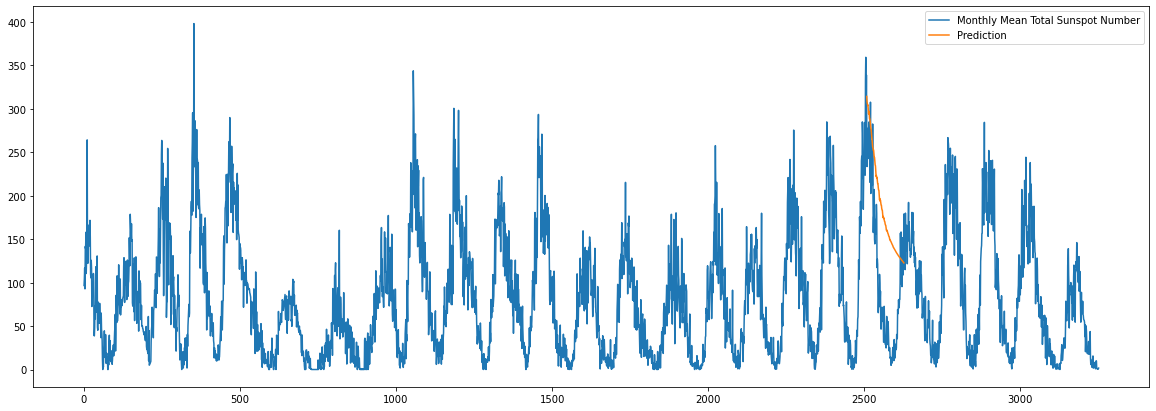

In [42]:
forecast = model.predict(n_periods=n, return_conf_int=True)
forecast_df = pd.DataFrame(forecast[0],index = test1.index,columns=['Prediction'])

pd.concat([df['Monthly Mean Total Sunspot Number'],forecast_df],axis=1).plot()

## END